### Controlling Overfitting using Regularized Regression 

### Part 1 - Learning how to Fit Regularized Regression Model

In [1]:
#The required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data Hitters (same data we used in our ML class)
hit = pd.read_csv("Hitters.csv")

### Preparing the Data for Model Building

In [3]:
#Variables
hit.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [4]:
#Let us drop the column 'Unnamed'
hit2=hit.drop('Unnamed: 0',axis=1)

In [5]:
#Missing values?
hit2.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
#The target variable 'Salary' contains some missing values.
#Let us drop the rows containng these missing values

hit2=hit2.dropna()

In [7]:
hit2.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [8]:
hit2.shape

(263, 20)

In [9]:
hit2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
hit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [11]:
#Creating Dummy variables for the nominal variables ['League', 'Division', 'NewLeague']

dummies=pd.get_dummies(hit2[['League','Division','NewLeague']])

In [12]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [13]:
#Let us drop the original nominal variables from hit2 add these dummy variables to it (at the same time let us also remove the Target variable Salary)
#Step 1 - dropping

hit2=hit2.drop(['League','Division','NewLeague'],axis=1).astype('float64')

In [14]:
#Step 2 - Concatinating

hit2=pd.concat([hit2,dummies[['League_N','Division_W','NewLeague_N']]],axis=1)

In [15]:
hit2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,750.0,0,1,0


In [16]:
#Separating out the predictors (X) and the target (y)
y=hit2['Salary']
X=hit2.drop('Salary',axis=1)

In [17]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

In [18]:
#Dimension checks
print('dimension of the train X',X_train.shape)
print('dimension of the train y',y_train.shape)
print('dimension of the test X',X_test.shape)
print('dimension of the test y',y_test.shape)


dimension of the train X (131, 19)
dimension of the train y (131,)
dimension of the test X (132, 19)
dimension of the test y (132,)


### A. Fitting a Ridge Regression Model

In [19]:
#Libraries for Model fitting and Validation

from sklearn.preprocessing import scale                           #For scaling the data
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV   #For fitting regularized models and cross validation algo.
from sklearn.metrics import mean_squared_error                    #For validation


In [20]:
#Fitting a ridge regression for a particular value of alpha

ridge1=Ridge(alpha=4,normalize=True, fit_intercept=True)
ridge1.fit(X_train,y_train)

print('intercept ',ridge1.intercept_)
print(pd.Series(ridge1.coef_,index=X.columns))

intercept  136.67579374145896
AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64


In [21]:
ridge1

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [22]:
#Fitting a ridge regression for a particular value of alpha

ridge2=Ridge(alpha=10e10,normalize=True, fit_intercept=True)
ridge2.fit(X_train,y_train)

print('intercept ',ridge2.intercept_)
print(pd.Series(ridge2.coef_,index=X.columns))



intercept  532.709015221996
AtBat          1.317464e-11
Hits           4.647486e-11
HmRun          2.079865e-10
Runs           7.726175e-11
RBI            9.390640e-11
Walks          9.769219e-11
Years          3.961442e-10
CAtBat         1.060533e-12
CHits          3.993605e-12
CHmRun         2.959428e-11
CRuns          8.245247e-12
CRBI           7.795451e-12
CWalks         9.894387e-12
PutOuts        7.268991e-12
Assists       -2.615885e-13
Errors         2.084514e-11
League_N      -2.501281e-10
Division_W    -1.549951e-09
NewLeague_N   -2.023196e-10
dtype: float64


In [23]:
# Use a ridge regression model to predict the test data

pred1=ridge1.predict(X_test)

print('\nMSE=',mean_squared_error(y_test,pred1))


MSE= 106216.52238005561


In [24]:
pred2=ridge2.predict(X_test)

print('\nMSE=',mean_squared_error(y_test,pred2))


MSE= 172862.23590910813


In [25]:
#FOR MANY ALPHAS...
#creating a grid for alpha(a.k.a lambda)
alphas=10**np.linspace(10,-2,100)


In [26]:
#Fitting a Ridge Regression Model for each alpha

ridge=Ridge(normalize=True,fit_intercept=True)
coefs=[]

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.intercept_)
    coefs.append(ridge.coef_)

In [27]:
coefs

[532.7090148153795,
 array([ 1.31746375e-10,  4.64748588e-10,  2.07986517e-09,  7.72617506e-10,
         9.39063959e-10,  9.76921945e-10,  3.96144226e-09,  1.06053327e-11,
         3.99360518e-11,  2.95942756e-10,  8.24524707e-11,  7.79545054e-11,
         9.89438678e-11,  7.26899124e-11, -2.61588516e-12,  2.08451397e-10,
        -2.50128060e-09, -1.54995108e-08, -2.02319577e-09]),
 532.7090146699278,
 array([ 1.74160955e-10,  6.14370283e-10,  2.74945935e-09,  1.02135487e-09,
         1.24138729e-09,  1.29143332e-09,  5.23679353e-09,  1.40196257e-11,
         5.27931102e-11,  3.91218906e-10,  1.08997314e-10,  1.03051268e-10,
         1.30797970e-10,  9.60917862e-11, -3.45804623e-12,  2.75560479e-10,
        -3.30654574e-09, -2.04894412e-08, -2.67454574e-09]),
 532.7090144776492,
 array([ 2.30230532e-10,  8.12161357e-10,  3.63462345e-09,  1.35017103e-09,
         1.64104094e-09,  1.70719884e-09,  6.92273285e-09,  1.85331200e-11,
         6.97893847e-11,  5.17168370e-10,  1.44088034e-10,

In [28]:
coefs[99]

array([ 1.14509024e-04,  4.03975687e-04,  1.80764671e-03,  6.71556420e-04,
        8.16238180e-04,  8.49195167e-04,  3.44287169e-03,  9.21746806e-06,
        3.47110139e-05,  2.57228171e-04,  7.16647279e-05,  6.77565232e-05,
        8.59978412e-05,  6.31994119e-05, -2.27175465e-06,  1.81299636e-04,
       -2.17056079e-03, -1.34797225e-02, -1.75513882e-03])

In [29]:
#identifying the Best alpha (a.k.a. lambda)

ridgecv=RidgeCV(alphas=alphas,normalize=True,fit_intercept=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.49770235643321137

In [30]:
#MSE for the chosen alpha

ridge4=Ridge(alpha=ridgecv.alpha_,normalize=True,fit_intercept=True)
ridge4.fit(X_train,y_train)
mean_squared_error(y_test,ridge4.predict(X_test))

99997.3517290255

In [31]:
#Fit the model on the entire data

ridge4.fit(X,y)
print('intercept ',ridge4.intercept_)
pd.Series(ridge4.coef_,index=X.columns)

intercept  9.77111637456926


AtBat           0.039089
Hits            0.987271
HmRun           0.210328
Runs            1.108092
RBI             0.875440
Walks           1.778644
Years           0.351680
CAtBat          0.011224
CHits           0.063656
CHmRun          0.443470
CRuns           0.126382
CRBI            0.135001
CWalks          0.033335
PutOuts         0.188256
Assists         0.040423
Errors         -1.751570
League_N       26.494555
Division_W    -90.056030
NewLeague_N     7.580892
dtype: float64

In [32]:
#Study the Ridge() function - It works somewhat differently from what we do in R

Ridge    #Press shift + Tab (3 times)

sklearn.linear_model.ridge.Ridge

### B. Fitting a LASSO Model

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\s

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\s

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  import sys


Text(0,0.5,'weights')

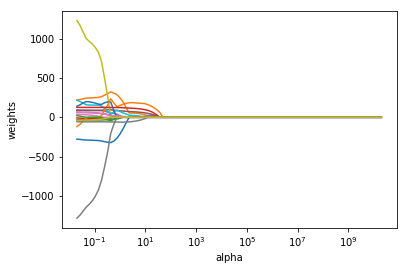

In [33]:
import sys
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


In [34]:
#Fitting a Lasso Model

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


104960.65853895503

In [35]:
# Some of the coefficients are now reduced to exactly zero.
print(pd.Series(lasso.coef_, index=X_train.columns))

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64


# Part 2 - Controlling overfitting using Regularized Regression

For the next section you will be using the housing data that you have used in the previous session

## 1. Create a basic setup

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’. (You may copy and paste the polynomial_dataframe() function created in the previous day)

In [36]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    import pandas
    feature=np.array(feature,dtype='float64')
    poly_dataframe = pandas.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    #...
    
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            #...
            
            poly_dataframe[name] = feature**power
            
            
    return poly_dataframe



In [37]:
data=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')

In [38]:
data3=data.sort_values(['sqft_living'],ascending=True)

In [39]:
X1=data3.sqft_living

In [40]:
y1=data3.price
y1.head()

8840    142000.0
6982    276000.0
8338    265000.0
2228    228000.0
9631    245000.0
Name: price, dtype: float64

In [41]:
X11=polynomial_dataframe(X1,15)

## 2. Fitting a Polynomial L2 Regularised Regression Model of Order 15

Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5. Plot the model on the scatter plot



In [42]:
l2_small_penalty = 1.5e-5

In [43]:
ridge5=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge5.fit(X11,y1)

print('intercept ',ridge5.intercept_)
print(pd.Series(ridge5.coef_,index=X11.columns))

intercept  200016.12341889658
power_1     1.398484e+02
power_2    -3.801365e-02
power_3     2.091285e-05
power_4    -7.374826e-10
power_5    -1.789261e-13
power_6    -2.752310e-18
power_7     7.722181e-22
power_8     8.354071e-26
power_9     4.659695e-30
power_10    9.956792e-35
power_11   -1.116553e-38
power_12   -1.750081e-42
power_13   -1.463662e-46
power_14   -7.793427e-51
power_15   -3.737771e-56
dtype: float64


In [44]:
x11_pred=ridge5.predict(X11)

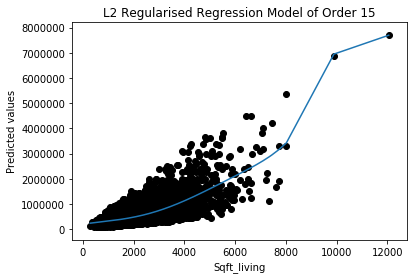

In [45]:
plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15')
plt.show()

## 3. Observe Overfitting

Recall from the last exercise that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. 


In this exercise you will reproduce the same experiment you did in the last class, except this time use a Ridge Regression model instead of OLS regression.




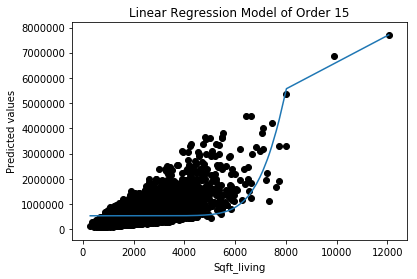

In [46]:
#fitting a OLS model to check the behaviour of linear regression on order 15 complextity. It seems it is overfitting the model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X11,y1)

x11_pred=lm.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('Linear Regression Model of Order 15')
plt.show()

Here,in the OLS model high overfitting can be seen. So,it can be easily infered that with high complexity, overfitting increases.

To avoid this overfitting, Regularised linear model is used.

### 3a. Fit a polynomial of degree 2 (Use L2 Penalty) 

Fit a polynomial regression of order 2. Plot the model on the scatter plot. (Use the l2_small_penalty)

intercept  267463.5357857094
power_1    1.264319
power_2    0.052288
dtype: float64


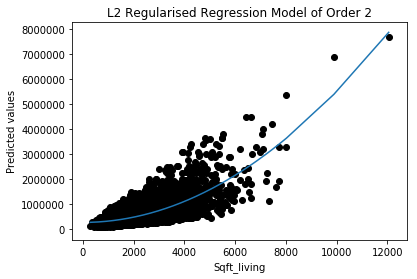

In [47]:
#L2 model for order 2

X11=polynomial_dataframe(X1,2)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 2')
plt.show()

### 3b. Fit higher order polynomial fits (Use L2 Penalty)

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect? (Use the l2_small_penalty)

intercept  261933.4384286218
power_1    7.770148e+00
power_2    5.022642e-02
power_3    1.732669e-07
dtype: float64


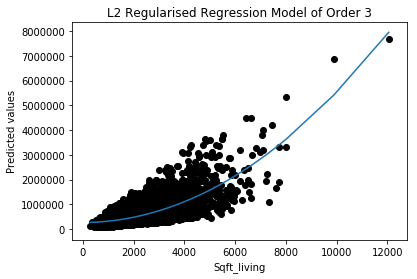

In [48]:
#L2 model for order 3

X11=polynomial_dataframe(X1,3)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 3')
plt.show()

intercept  275518.16506463
power_1   -1.271831e+01
power_2    5.972112e-02
power_3   -1.426776e-06
power_4    8.196905e-11
dtype: float64


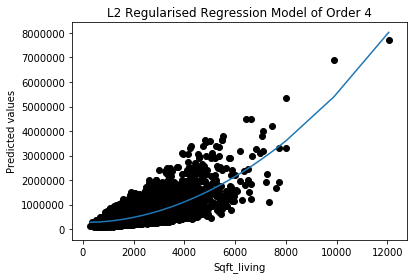

In [49]:
#L2 model for order 4

X11=polynomial_dataframe(X1,4)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 4')
plt.show()

intercept  284761.79389571946
power_1   -3.076608e+01
power_2    7.154497e-02
power_3   -4.692184e-06
power_4    4.637330e-10
power_5   -1.521838e-14
dtype: float64


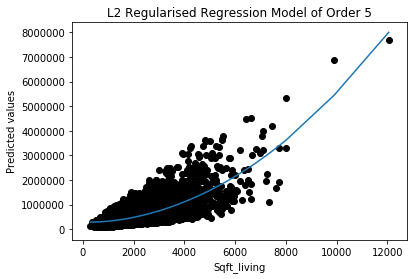

In [50]:
#L2 model for order 5

X11=polynomial_dataframe(X1,5)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 5')
plt.show()

L2 regularised linear model for order 3,4 and 5, very small ncreasing overfitting can be seen.

With lower complexity, overfitting is less.



### 3c. Fit a polynomial of order 15 (Use L2 Penalty)

Now try a 15th degree polynomial (Use the L2_small_penalty). Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

intercept  200016.12341889658
power_1     1.398484e+02
power_2    -3.801365e-02
power_3     2.091285e-05
power_4    -7.374826e-10
power_5    -1.789261e-13
power_6    -2.752310e-18
power_7     7.722181e-22
power_8     8.354071e-26
power_9     4.659695e-30
power_10    9.956792e-35
power_11   -1.116553e-38
power_12   -1.750081e-42
power_13   -1.463662e-46
power_14   -7.793427e-51
power_15   -3.737771e-56
dtype: float64


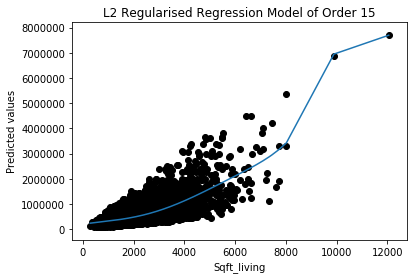

In [51]:
#L2 model for order 15

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15')
plt.show()

In this experiment, the higher degree is increasing the variance in the model, which is creating overfitting. But at the same time it is reducing the bias in the model, which is helping in reducing undrefitting.

So, it is required to create a trade-off between the bias and variance.

Very high overfitting can be seen with small tuning parameter/alpha for order 15 because of high variance.

But here, overfitting is less compared to the OLS model. This is mainly because of tuning parameter/alpha value.

Also, with small tuning parameter(very close to 0), it can be easily seen that, the model tends to follow Ordinary Least square solution (OLS).

### 3d. Explore Overfitting due to High Variance (Due to less penalization)
Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

Shape of Dataset :  (5404, 21)
intercept  288998.10746191
power_1    -1.521072e+01
power_2     4.322619e-02
power_3     7.613014e-06
power_4    -1.010525e-09
power_5    -3.598302e-14
power_6     2.800674e-18
power_7     3.295998e-22
power_8     1.655002e-26
power_9     2.777676e-31
power_10   -3.528867e-35
power_11   -4.653746e-39
power_12   -3.493436e-43
power_13   -1.836157e-47
power_14   -4.561805e-52
power_15    4.508343e-56
dtype: float64


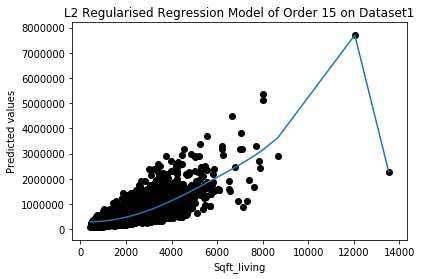

In [80]:
#for dataset 1

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_1_data.csv')
print('Shape of Dataset : ',datap1.shape)
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 on Dataset1')
plt.show()

Shape of Dataset :  (5398, 21)
intercept  113497.43719155982
power_1     2.881851e+02
power_2    -1.006667e-01
power_3     1.969374e-05
power_4     2.734468e-09
power_5    -2.151269e-13
power_6    -5.519020e-17
power_7    -3.675677e-21
power_8     8.955635e-26
power_9     4.705539e-29
power_10    5.946576e-33
power_11    4.572079e-37
power_12    1.559803e-41
power_13   -1.767603e-45
power_14   -4.156648e-49
power_15   -4.608728e-53
dtype: float64


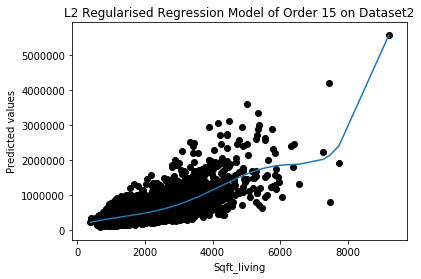

In [81]:
#for dataset 2

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_2_data.csv')
print('Shape of Dataset : ',datap1.shape)
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 on Dataset2')
plt.show()

Shape of Dataset :  (5409, 21)
intercept  174149.6043119643
power_1     1.871745e+02
power_2    -6.120770e-02
power_3     2.365133e-05
power_4    -1.986093e-10
power_5    -2.520728e-13
power_6    -1.183843e-17
power_7     9.608936e-22
power_8     1.822185e-25
power_9     1.275362e-29
power_10    7.234892e-35
power_11   -1.002419e-37
power_12   -1.448898e-41
power_13   -1.071478e-45
power_14    1.056665e-50
power_15    1.933544e-53
dtype: float64


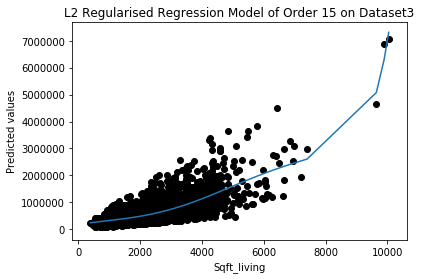

In [79]:
#for dataset 3

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_3_data.csv')
print('Shape of Dataset : ',datap1.shape)
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 on Dataset3')
plt.show()

Shape of Dataset :  (5402, 21)
intercept  175579.19735911133
power_1     1.290052e+02
power_2     2.495609e-02
power_3    -1.328202e-05
power_4     2.004839e-09
power_5     6.909411e-13
power_6     1.951527e-17
power_7    -1.277240e-20
power_8    -2.494318e-24
power_9    -2.106240e-28
power_10    4.709508e-33
power_11    4.629674e-36
power_12    8.423701e-40
power_13    8.516897e-44
power_14    1.127619e-49
power_15   -2.319811e-51
dtype: float64


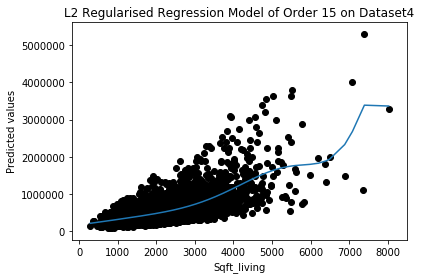

In [82]:
#for dataset 4

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_4_data.csv')
print('Shape of Dataset : ',datap1.shape)
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_small_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 on Dataset4')
plt.show()

What do you observe? Validate your understanding based on the output you got.

Yes, overfitting is observed with higher complexity data even when the dataset set is changed, when smaller value of alpha has been taken.

With small tuning parameter/alpha L2 regularisation model is less likely to penalise coefficients, hence variance is high and overfitting can be seen clearly.

Small tuning parameter, makes model to follow OLS solution, where with increase in complexity, overfitting increases( beacuse variance is high).

## 4. Penalizing the Coefficient to Prevent Overfitting

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)




In [56]:
l2_large_penalty=1.23e2

### 4a. Repeat steps 3a and 3b (Using large L2 penalty)

intercept  535725.5346442527
power_1    2.30878
power_2    0.00042
dtype: float64


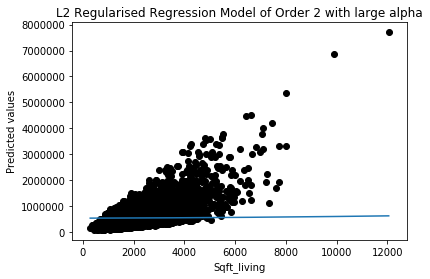

In [57]:
#L2 model for order 2

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,2)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 2 with large alpha')
plt.show()

intercept  534823.7901394919
power_1    2.295315e+00
power_2    4.174898e-04
power_3    6.053758e-08
dtype: float64


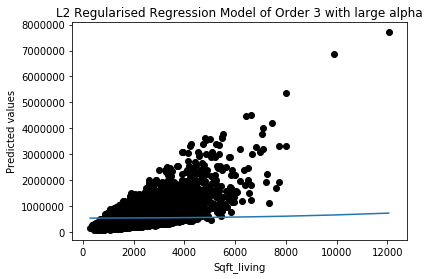

In [58]:
#L2 model for order 3

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,3)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 3 with large alpha')
plt.show()

intercept  534532.9867684139
power_1    2.288308e+00
power_2    4.157535e-04
power_3    6.018506e-08
power_4    5.664341e-12
dtype: float64


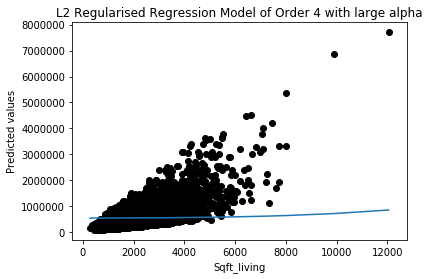

In [59]:
#L2 model for order 4

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,4)



ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 4 with large alpha')
plt.show()

intercept  534446.1084004383
power_1    2.284967e+00
power_2    4.147831e-04
power_3    5.995776e-08
power_4    5.631698e-12
power_5    4.127855e-16
dtype: float64


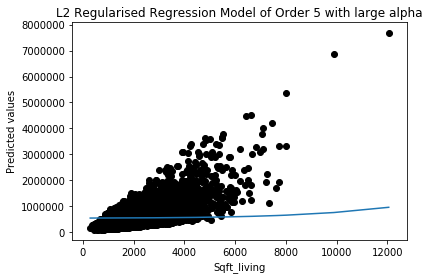

In [60]:
#L2 model for order 5

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,5)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 5 with large alpha')
plt.show()

### 4b. Fit a polynomial of order 15 (Using large L2 penalty)

intercept  534381.588880089
power_1     2.277373e+00
power_2     4.118422e-04
power_3     5.909967e-08
power_4     5.488657e-12
power_5     3.968564e-16
power_6     2.758020e-20
power_7     1.985331e-24
power_8     1.489106e-28
power_9     1.151924e-32
power_10    9.098372e-37
power_11    7.285939e-41
power_12    5.888708e-45
power_13    4.789831e-49
power_14    3.913689e-53
power_15    3.208427e-57
dtype: float64


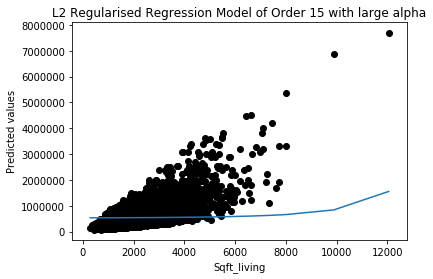

In [61]:
datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with large alpha')
plt.show()

It can be clearly seen from the above experiment that, when tuning parameter/alpha is high, in order to minimise the cost function the L2 optimization model chooses the very small value of coefficients.

With high value of tuning parameter/alpha, the variance seems to decrease but simultaneously increases the Bias in the data. Hence model is not overfitted but underfitting can be observed.

Model is highly biased with high alpha even at higher complexity.

### 4c. Overfitting or Not?

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. These curves should vary a lot less, now that you introduced regularization.

intercept  539103.0310577954
power_1     2.328068e+00
power_2     3.536216e-04
power_3     3.319697e-08
power_4     2.000825e-12
power_5     1.114926e-16
power_6     6.577861e-21
power_7     4.129395e-25
power_8     2.703938e-29
power_9     1.816148e-33
power_10    1.238243e-37
power_11    8.518725e-42
power_12    5.894556e-46
power_13    4.095426e-50
power_14    2.854649e-54
power_15    1.995475e-58
dtype: float64


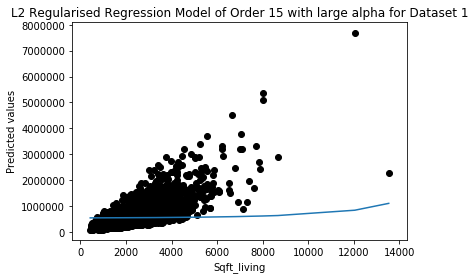

In [62]:
#for dataset 1

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_1_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with large alpha for Dataset 1')
plt.show()

intercept  529853.0253577976
power_1     2.097569e+00
power_2     3.908175e-04
power_3     6.671899e-08
power_4     8.900030e-12
power_5     9.726399e-16
power_6     9.697337e-20
power_7     9.505645e-24
power_8     9.444910e-28
power_9     9.571913e-32
power_10    9.869452e-36
power_11    1.031011e-39
power_12    1.087298e-43
power_13    1.154537e-47
power_14    1.232113e-51
power_15    1.319867e-55
dtype: float64


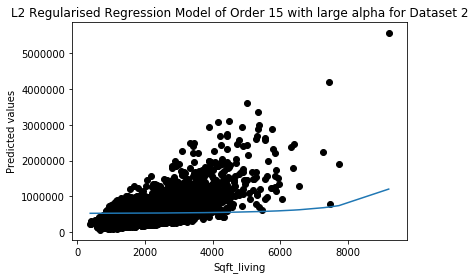

In [63]:
#for dataset 2

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_2_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with large alpha for Dataset 2')
plt.show()

intercept  533640.1140974432
power_1     2.289063e+00
power_2     4.124722e-04
power_3     6.088353e-08
power_4     6.585722e-12
power_5     6.152782e-16
power_6     5.644466e-20
power_7     5.288344e-24
power_8     5.070914e-28
power_9     4.946573e-32
power_10    4.880438e-36
power_11    4.850091e-40
power_12    4.841615e-44
power_13    4.846350e-48
power_14    4.858836e-52
power_15    4.875585e-56
dtype: float64


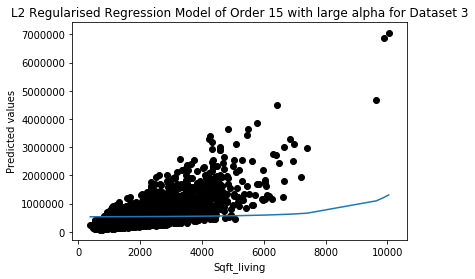

In [64]:
#for dataset 3

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_3_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with large alpha for Dataset 3')
plt.show()

intercept  524562.9690466832
power_1     2.085962e+00
power_2     4.050358e-04
power_3     7.468646e-08
power_4     1.130966e-11
power_5     1.458644e-15
power_6     1.735613e-19
power_7     2.016096e-23
power_8     2.346053e-27
power_9     2.756361e-31
power_10    3.270431e-35
power_11    3.910469e-39
power_12    4.701180e-43
power_13    5.672123e-47
power_14    6.859581e-51
power_15    8.308436e-55
dtype: float64


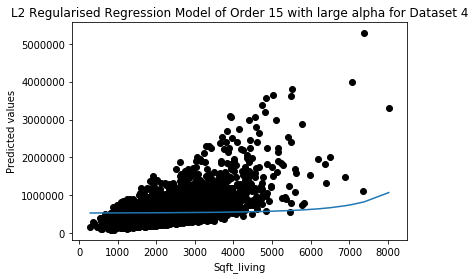

In [65]:
#for dataset 4

datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_set_4_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)

ridge6=Ridge(alpha=l2_large_penalty,normalize=True, fit_intercept=True)
ridge6.fit(X11,y1)
print('intercept ',ridge6.intercept_)
print(pd.Series(ridge6.coef_,index=X11.columns))

x11_pred=ridge6.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with large alpha for Dataset 4')
plt.show()

Unlike, the graphs of the small alpha value, here with high tuning parameter/alpha value, the model, even with high complexity, seems to underfit the data.

From above experiment it can be proved that with high tuning parameter, the bias increases and variance decreases.

There is no overfitting, but underfitting can be seen with high alpha.

Model is highly biased.

### 4d. Controlling overfitting

Select the best alpha value for the 15th-order polynomial model. Re-fit the model on the data. Print the estimated coefficients and plot the model on the scatter plot

In [83]:
alphas = 10**np.linspace(10,-2,100)
#alphas

In [84]:
datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)


In [85]:
ridge = Ridge(normalize = True)
coefs = []                               #initialising coef. blank list
mse=[]                                   #initialising mse blank list

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X11, y1)
    coefs.append(ridge.coef_)
    mse.append(mean_squared_error(y1,ridge.predict(X11)))
    

In [86]:
#minimum value for mse
min(mse)                        

63246284692.50496

In [87]:
#creating a dataframe to get corresponding alphas and mse values
alphadf=pd.DataFrame(alphas,columns=['Alphas'])
alphadf['MSE']=mse
alphadf.head()

,Alphas,MSE
0,1.000000e+10,1.440265e+11
1,7.564633e+09,1.440265e+11
2,5.722368e+09,1.440265e+11
3,4.328761e+09,1.440265e+11
4,3.274549e+09,1.440265e+11


In [88]:
#checking for the minimum value of alpha correcponding the minimum value of mse
alphadf.loc[alphadf.MSE == 63246284692.50496]

,Alphas,MSE
99,0.01,6.324628e+10


In [89]:
#getting the minimum value for the alpha with respect to mse
alpha1=alphadf.loc[alphadf['MSE'].idxmin()][0]
alpha1

0.01

intercept  202982.97496328887
power_1     7.988240e+01
power_2     2.605603e-02
power_3     2.413884e-06
power_4     1.273406e-11
power_5    -5.806463e-15
power_6    -1.262752e-19
power_7     2.889372e-23
power_8     4.082558e-27
power_9     3.379523e-31
power_10    2.008559e-35
power_11    6.649167e-40
power_12   -3.794904e-44
power_13   -1.079056e-47
power_14   -1.482316e-51
power_15   -1.663407e-55
dtype: float64


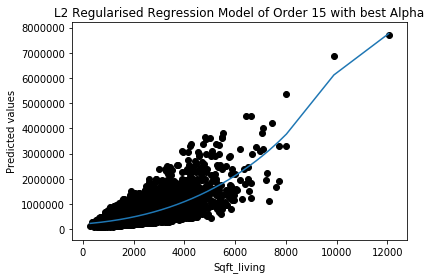

In [90]:
#fitting the model with best minimum value obtained above

ridgef=Ridge(alpha=alpha1,normalize=True, fit_intercept=True)
ridgef.fit(X11,y1)
print('intercept ',ridgef.intercept_)
print(pd.Series(ridgef.coef_,index=X11.columns))

x11_pred=ridgef.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with best Alpha')
plt.show()

In this experiment, the best value of tuning parameter has been selected from a given range which is 0.01.

With this best value of tuning parameter(alpha), it can been seen from the graph that, the L2 regularised model seem to create a trade-off between the bias and variance.

This model is free from overfitting, and can be seen that, some non-contributing coefficients are made small as close to 0.

## 5. Selecting an L2 penalty via cross-validation

Repeat step 4 but this time using L2 Penalty.

In [75]:
#FOR MANY ALPHAS...
#creating a grid for alpha(a.k.a lambda)

alphas=10**np.linspace(10,-2,100)


In [76]:
datap1=pd.read_csv('C://Users//Vinay//Downloads//Model_Interpretation//wk3_kc_house_train_data.csv')
data3=datap1.sort_values(['sqft_living'],ascending=True)

X1=data3.sqft_living
y1=data3.price
X11=polynomial_dataframe(X1,15)


In [77]:
#identifying the Best alpha (a.k.a. lambda) using RidgeCV

ridgecv=RidgeCV(alphas=alphas,normalize=True,fit_intercept=True)
ridgecv.fit(X11,y1)
ridgecv.alpha_

0.12328467394420634

intercept  194887.56594607356
power_1     1.034980e+02
power_2     1.793665e-02
power_3     2.004019e-06
power_4     1.136345e-10
power_5     3.798624e-15
power_6     8.102414e-20
power_7    -6.446627e-25
power_8    -3.162654e-28
power_9    -4.146101e-32
power_10   -4.674571e-36
power_11   -4.927676e-40
power_12   -4.942540e-44
power_13   -4.763637e-48
power_14   -4.448142e-52
power_15   -4.051721e-56
dtype: float64


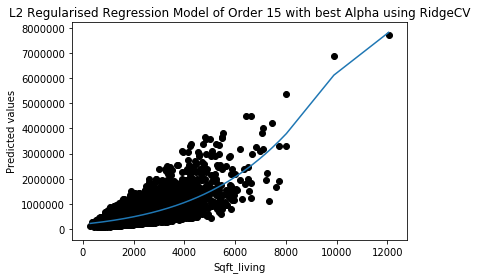

In [78]:
print('intercept ',ridgecv.intercept_)
print(pd.Series(ridgecv.coef_,index=X11.columns))

x11_pred=ridgecv.predict(X11)

plt.plot(X1,x11_pred)
plt.scatter(X1,y1,c='black')
plt.ylabel('Predicted values')
plt.xlabel('Sqft_living')
plt.title('L2 Regularised Regression Model of Order 15 with best Alpha using RidgeCV')
plt.show()

By default, Ridge regression with built-in cross-validation performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

Here, with this function, best alpha value we get is 0.12328467394420634.

It can be seen that, with both method, L2 regularised model is likely to create a balanced model, and avoids overfitting.

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html